#### Autocorrelation Test

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
INITIAL_DATE = "2003-06-26"

futures_ir = pd.read_excel("./data/future_interest_rates/future_interest_rates.xlsx", index_col="Date")
futures_ir.index = pd.to_datetime(futures_ir.index)
futures_ir.sort_index(inplace=True)

futures_ir_returns = futures_ir.diff().dropna()

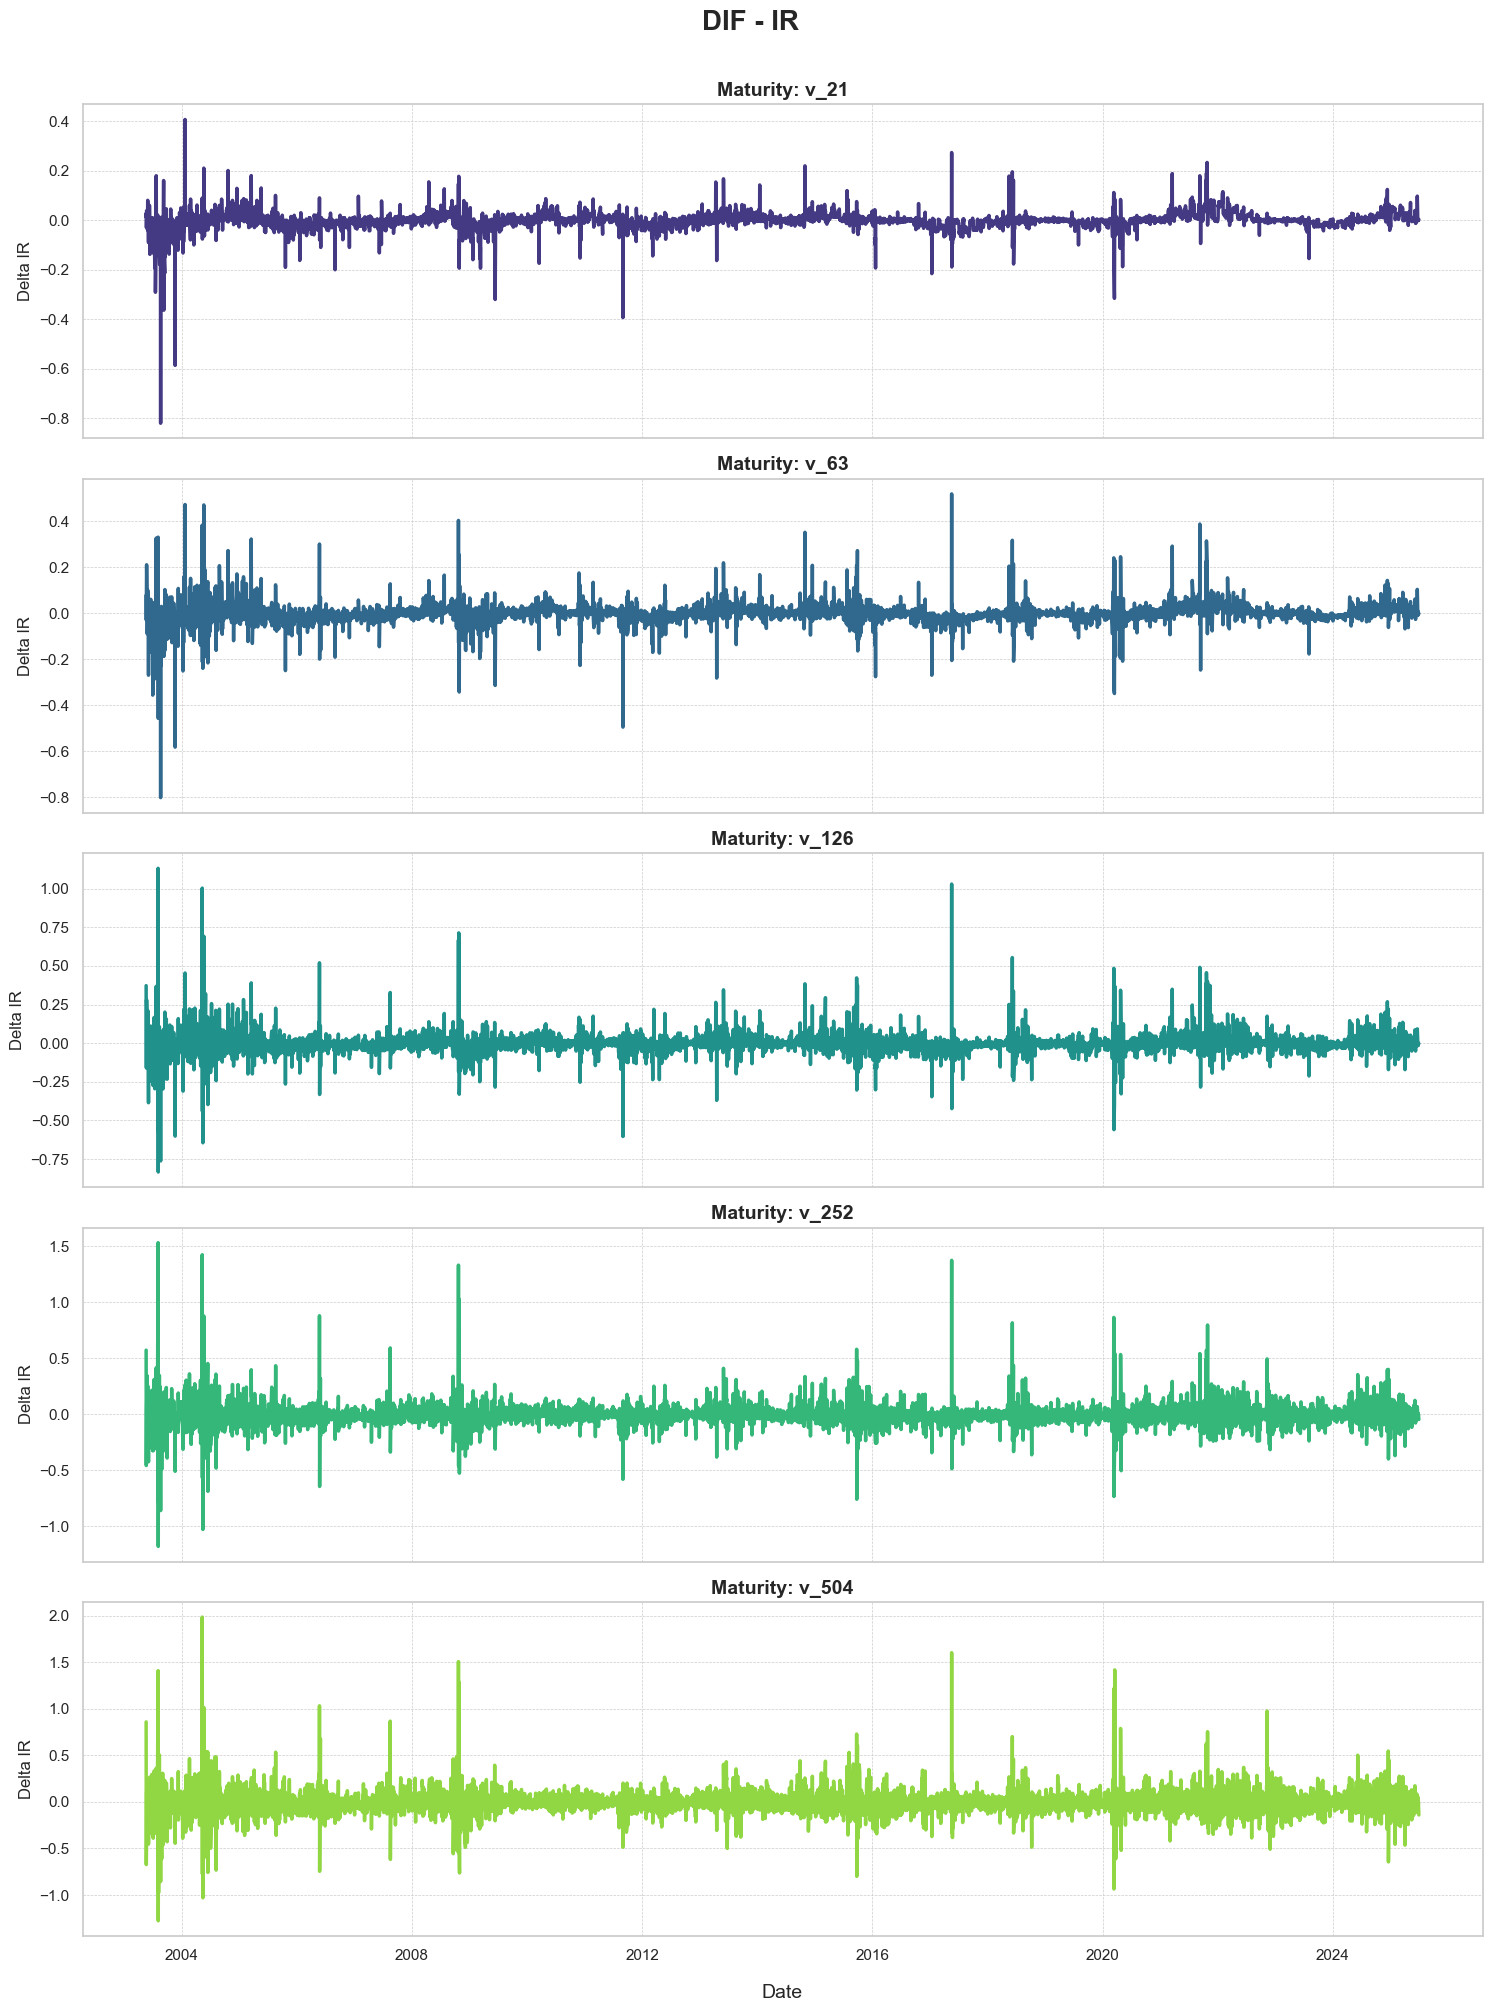

In [3]:
sns.set_theme(style="whitegrid")

columns = futures_ir_returns.columns
num_plots = len(columns)

fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(15, 4 * num_plots), sharex=True)

palette = sns.color_palette("viridis", n_colors=num_plots)

for ax, col, color in zip(axes, columns, palette):
    sns.lineplot(data=futures_ir_returns[col], ax=ax, color=color, linewidth=2.5)
    ax.set_title(f"Maturity: {col}", fontsize=14, weight="bold")
    ax.set_ylabel("Delta IR", fontsize=12)
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)

fig.suptitle("DIF - IR", fontsize=20, weight="bold", y=1.005)
plt.xlabel("Date", fontsize=14, labelpad=15)
plt.tight_layout()

plt.show()

### ACF AND PACF FOR DELTA IR

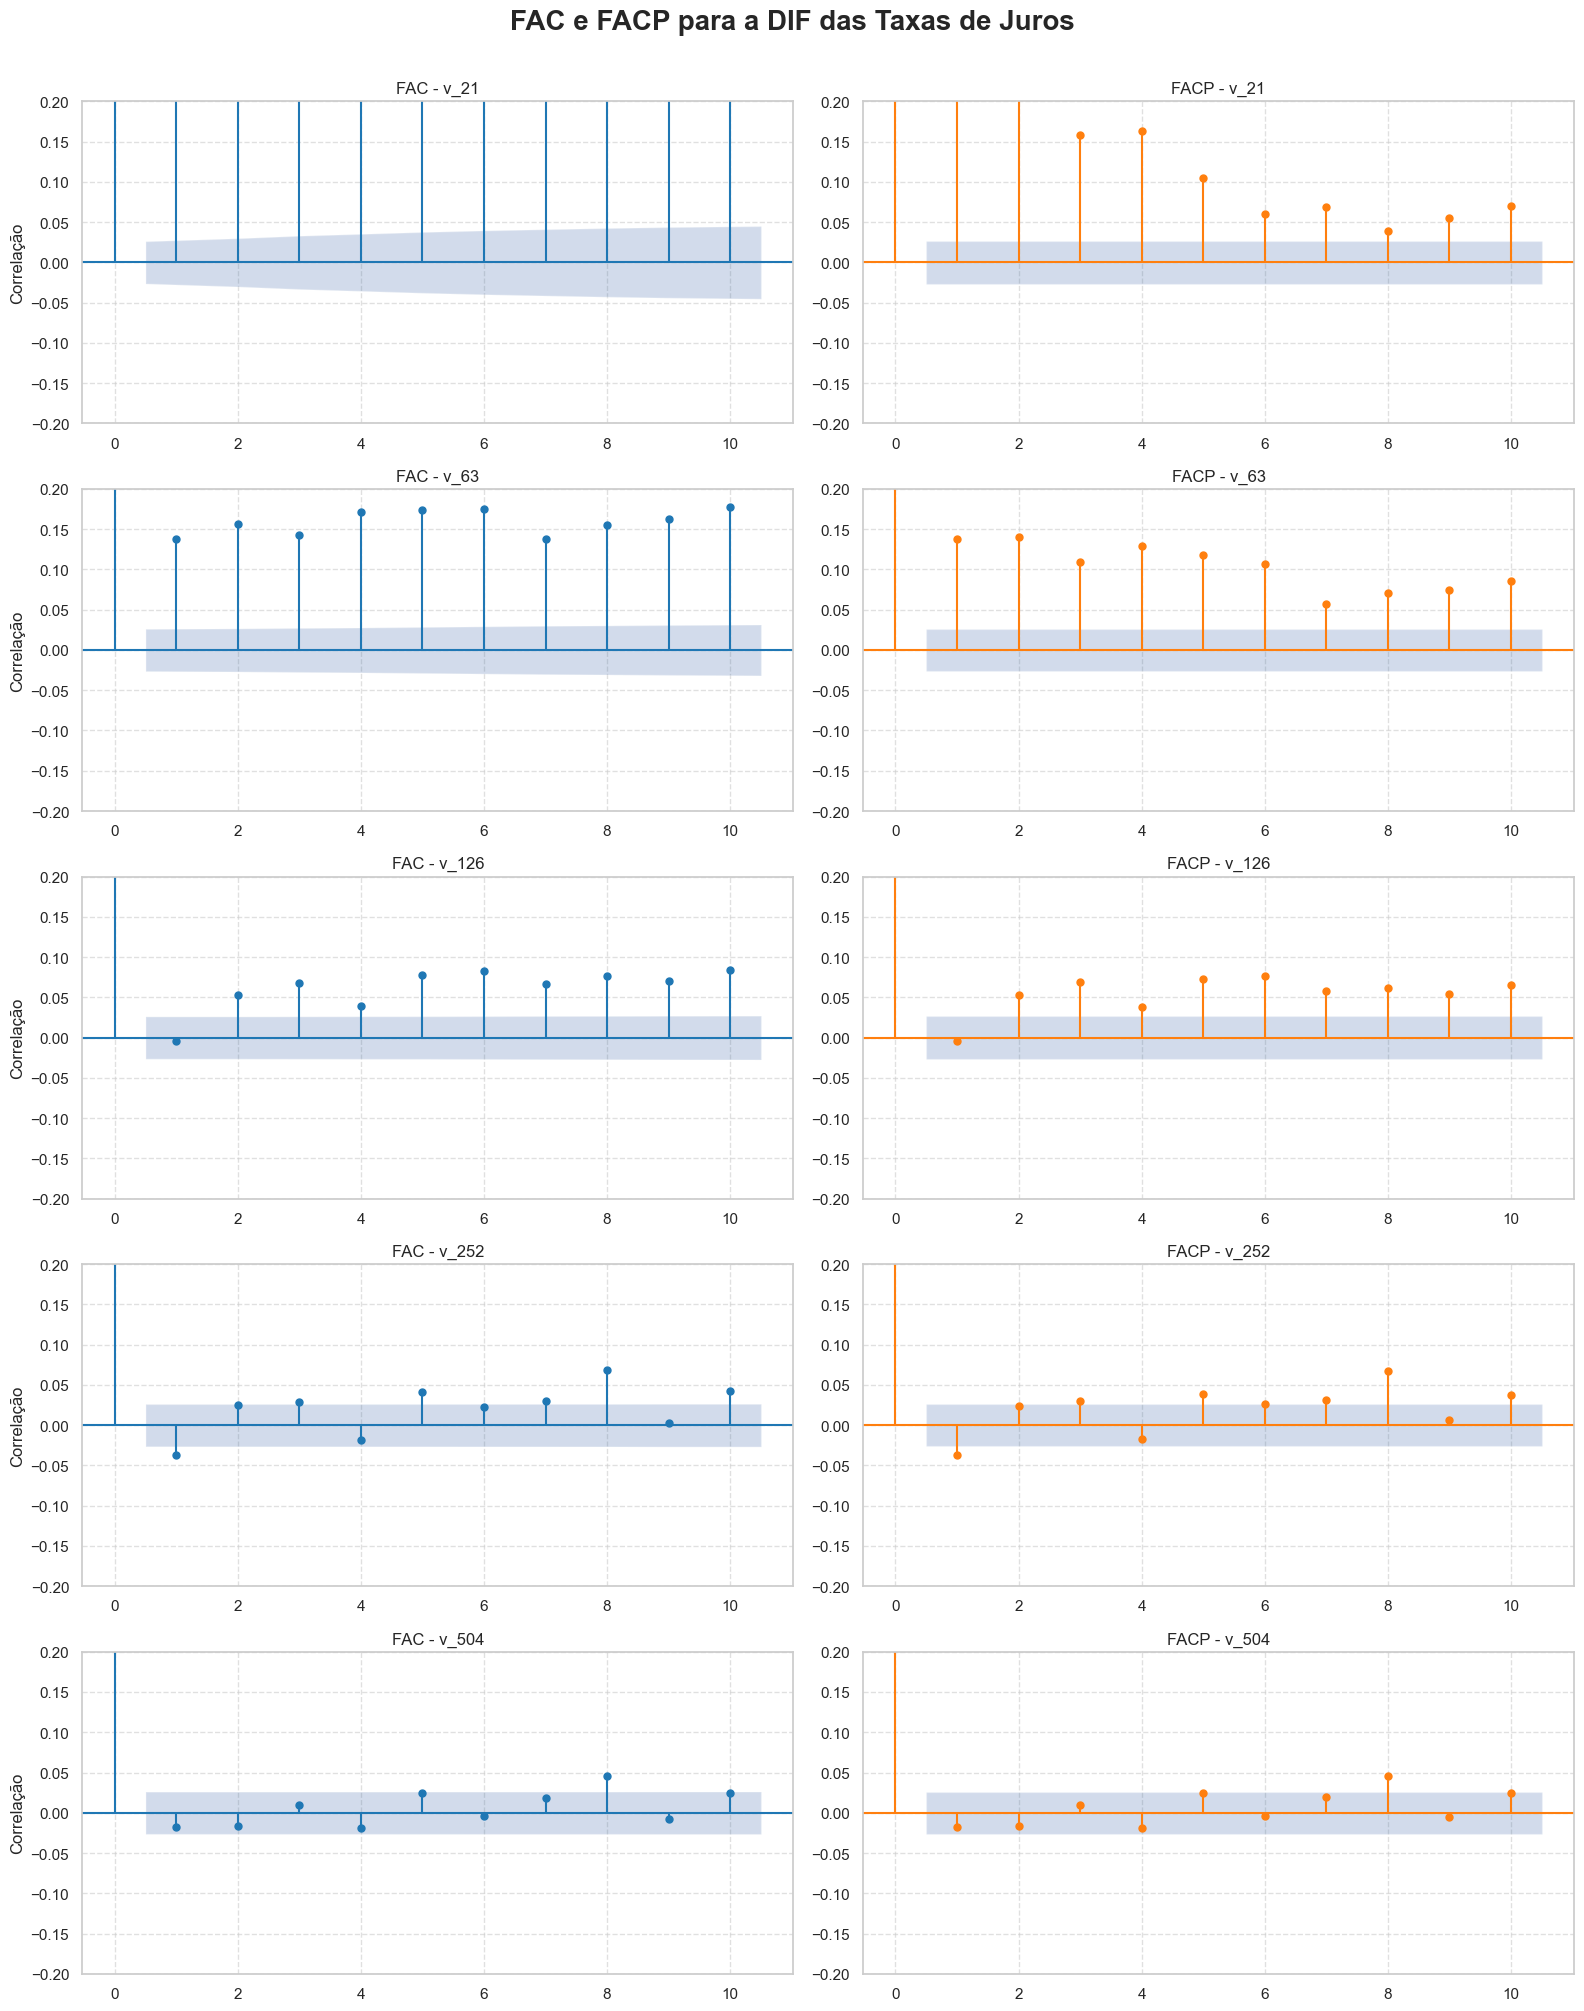

In [10]:
sns.set_theme(style="whitegrid")

columns = futures_ir_returns.columns
num_series = len(columns)

fig, axes = plt.subplots(nrows=num_series, ncols=2, figsize=(16, 4 * num_series))

fig.suptitle("FAC e FACP para a DIF das Taxas de Juros", 
             fontsize=20, weight="bold", y=1.005)

y_min = -0.2
y_max = 0.2

for i, col in enumerate(columns):
    series = futures_ir_returns[col].dropna()
    
    #FAC
    plot_acf(series, ax=axes[i, 0], title=f"FAC - {col}", lags=10, 
             color="tab:blue", vlines_kwargs={"colors": "tab:blue"})
    axes[i, 0].set_ylabel("Correlação")
    axes[i, 0].grid(True, linestyle="--", alpha=0.6)
    axes[i, 0].set_ylim(y_min, y_max)

    #FACP
    plot_pacf(series, ax=axes[i, 1], title=f"FACP - {col}", lags=10, 
              color="tab:orange", vlines_kwargs={"colors": "tab:orange"}, method="ywm")
    axes[i, 1].grid(True, linestyle="--", alpha=0.6)
    axes[i, 1].set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

### Same analysis but for publication date only, as in the regression

In [11]:
minutes_info = pd.read_excel("./data/raw/minutes_info.xlsx")
minutes_info = minutes_info[minutes_info["DataReferencia"] >= INITIAL_DATE]
minutes_info = minutes_info.sort_values("DataReferencia", ascending=True)

detes_pub = minutes_info["DataPublicacao"]

returns_pub_date = futures_ir_returns[futures_ir_returns.index.isin(detes_pub)]

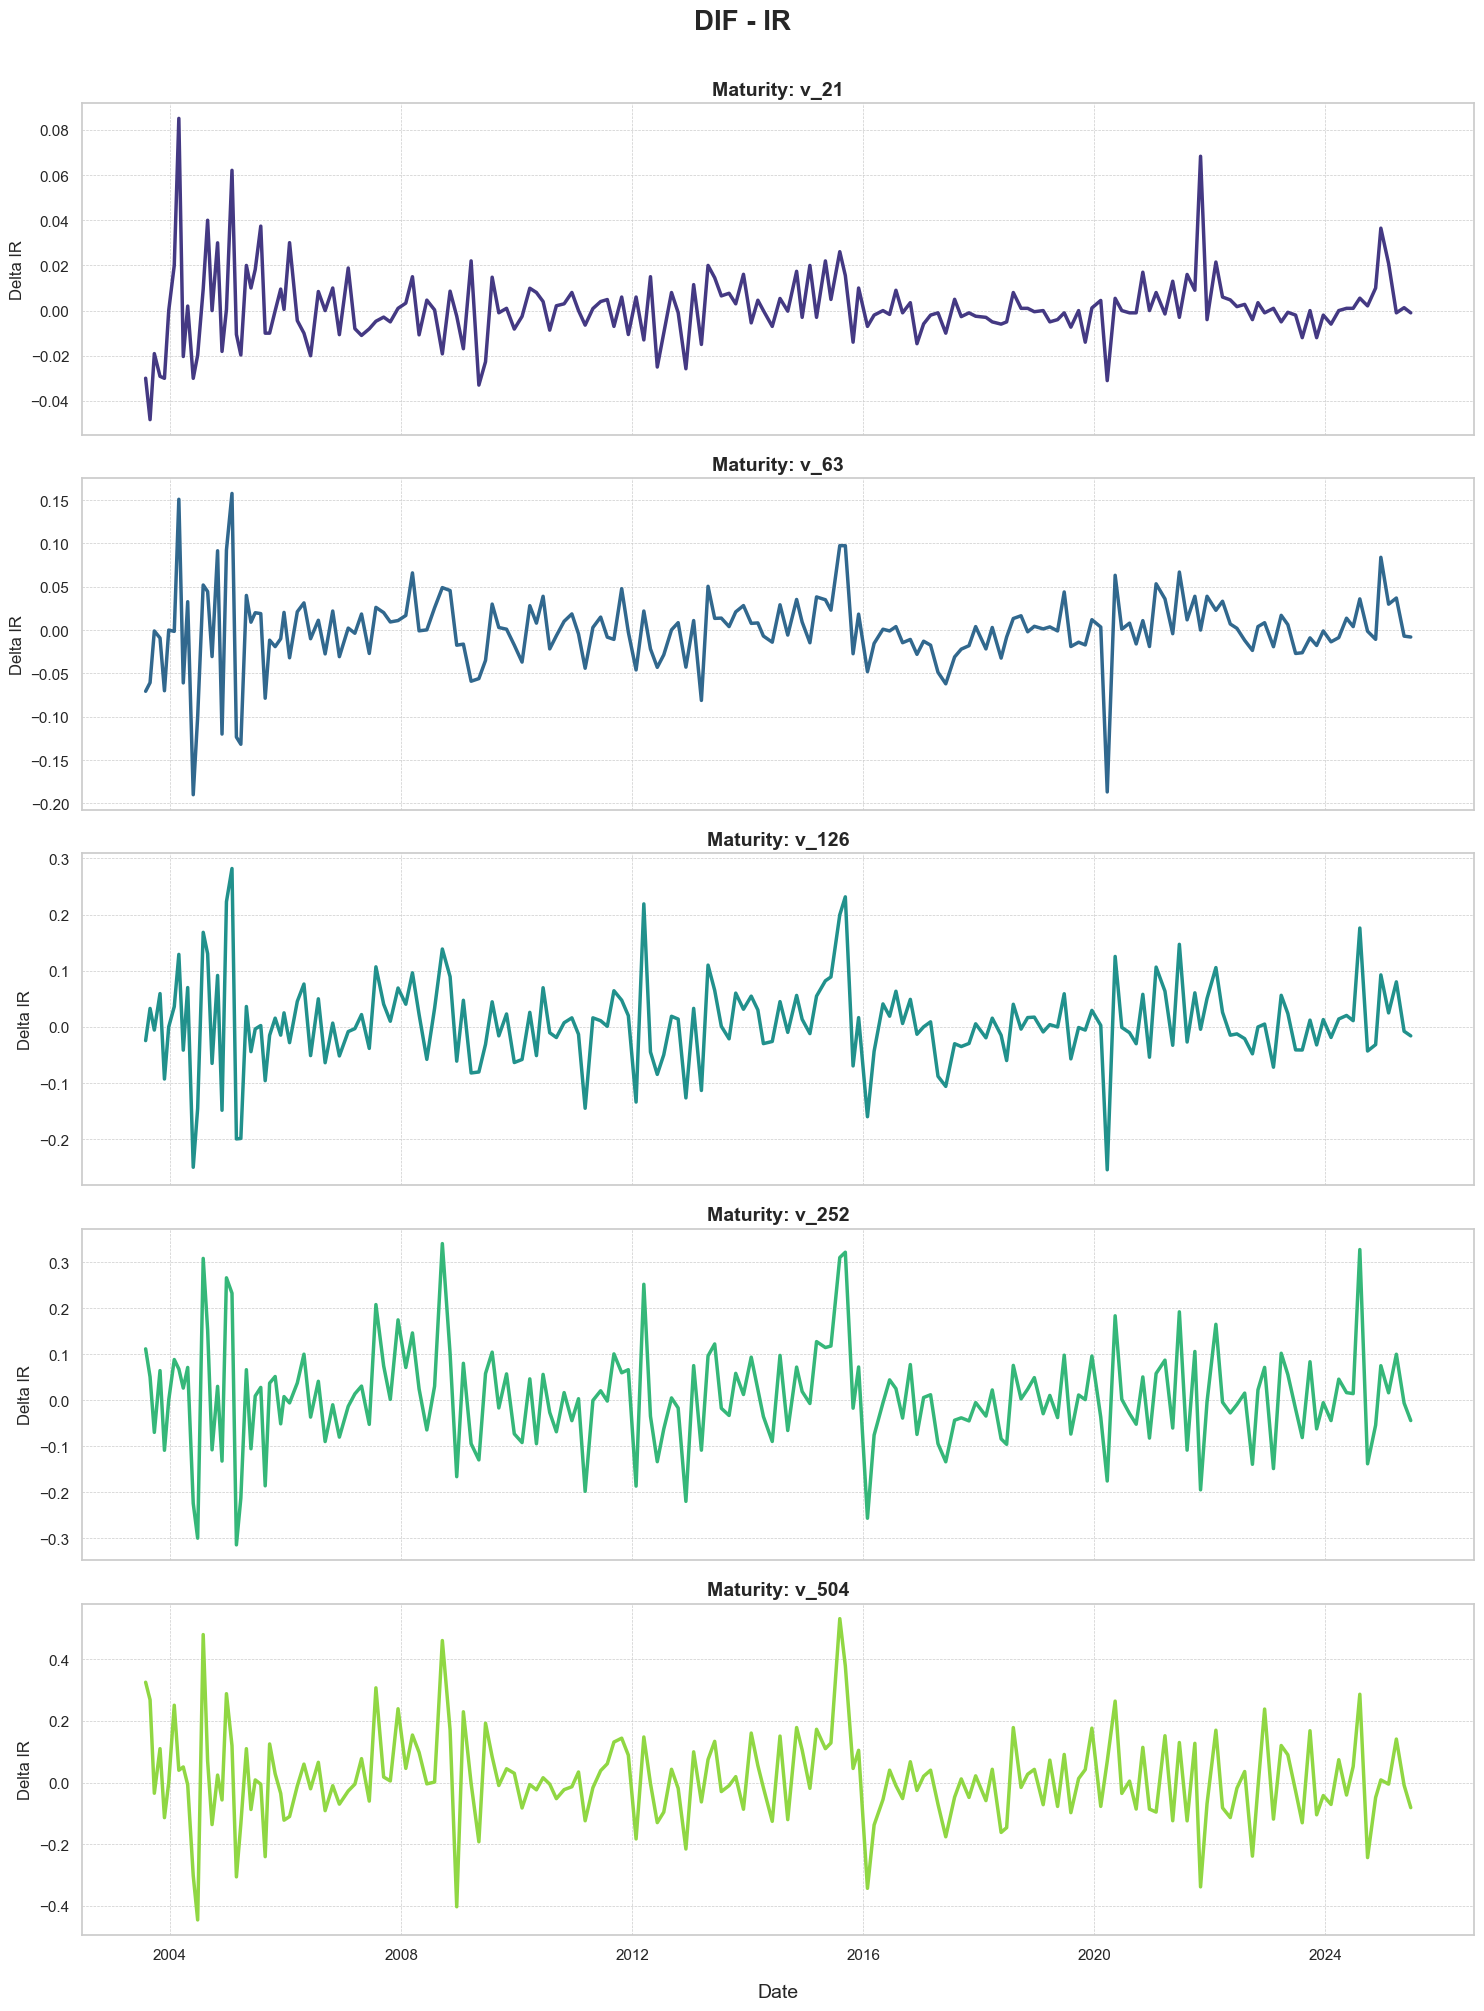

In [12]:
sns.set_theme(style="whitegrid")

columns = returns_pub_date.columns
num_plots = len(columns)

fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(15, 4 * num_plots), sharex=True)

palette = sns.color_palette("viridis", n_colors=num_plots)

for ax, col, color in zip(axes, columns, palette):
    sns.lineplot(data=returns_pub_date[col], ax=ax, color=color, linewidth=2.5)
    ax.set_title(f"Maturity: {col}", fontsize=14, weight="bold")
    ax.set_ylabel("Delta IR", fontsize=12)
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)

fig.suptitle("DIF - IR", fontsize=20, weight="bold", y=1.005)
plt.xlabel("Date", fontsize=14, labelpad=15)
plt.tight_layout()

plt.show()

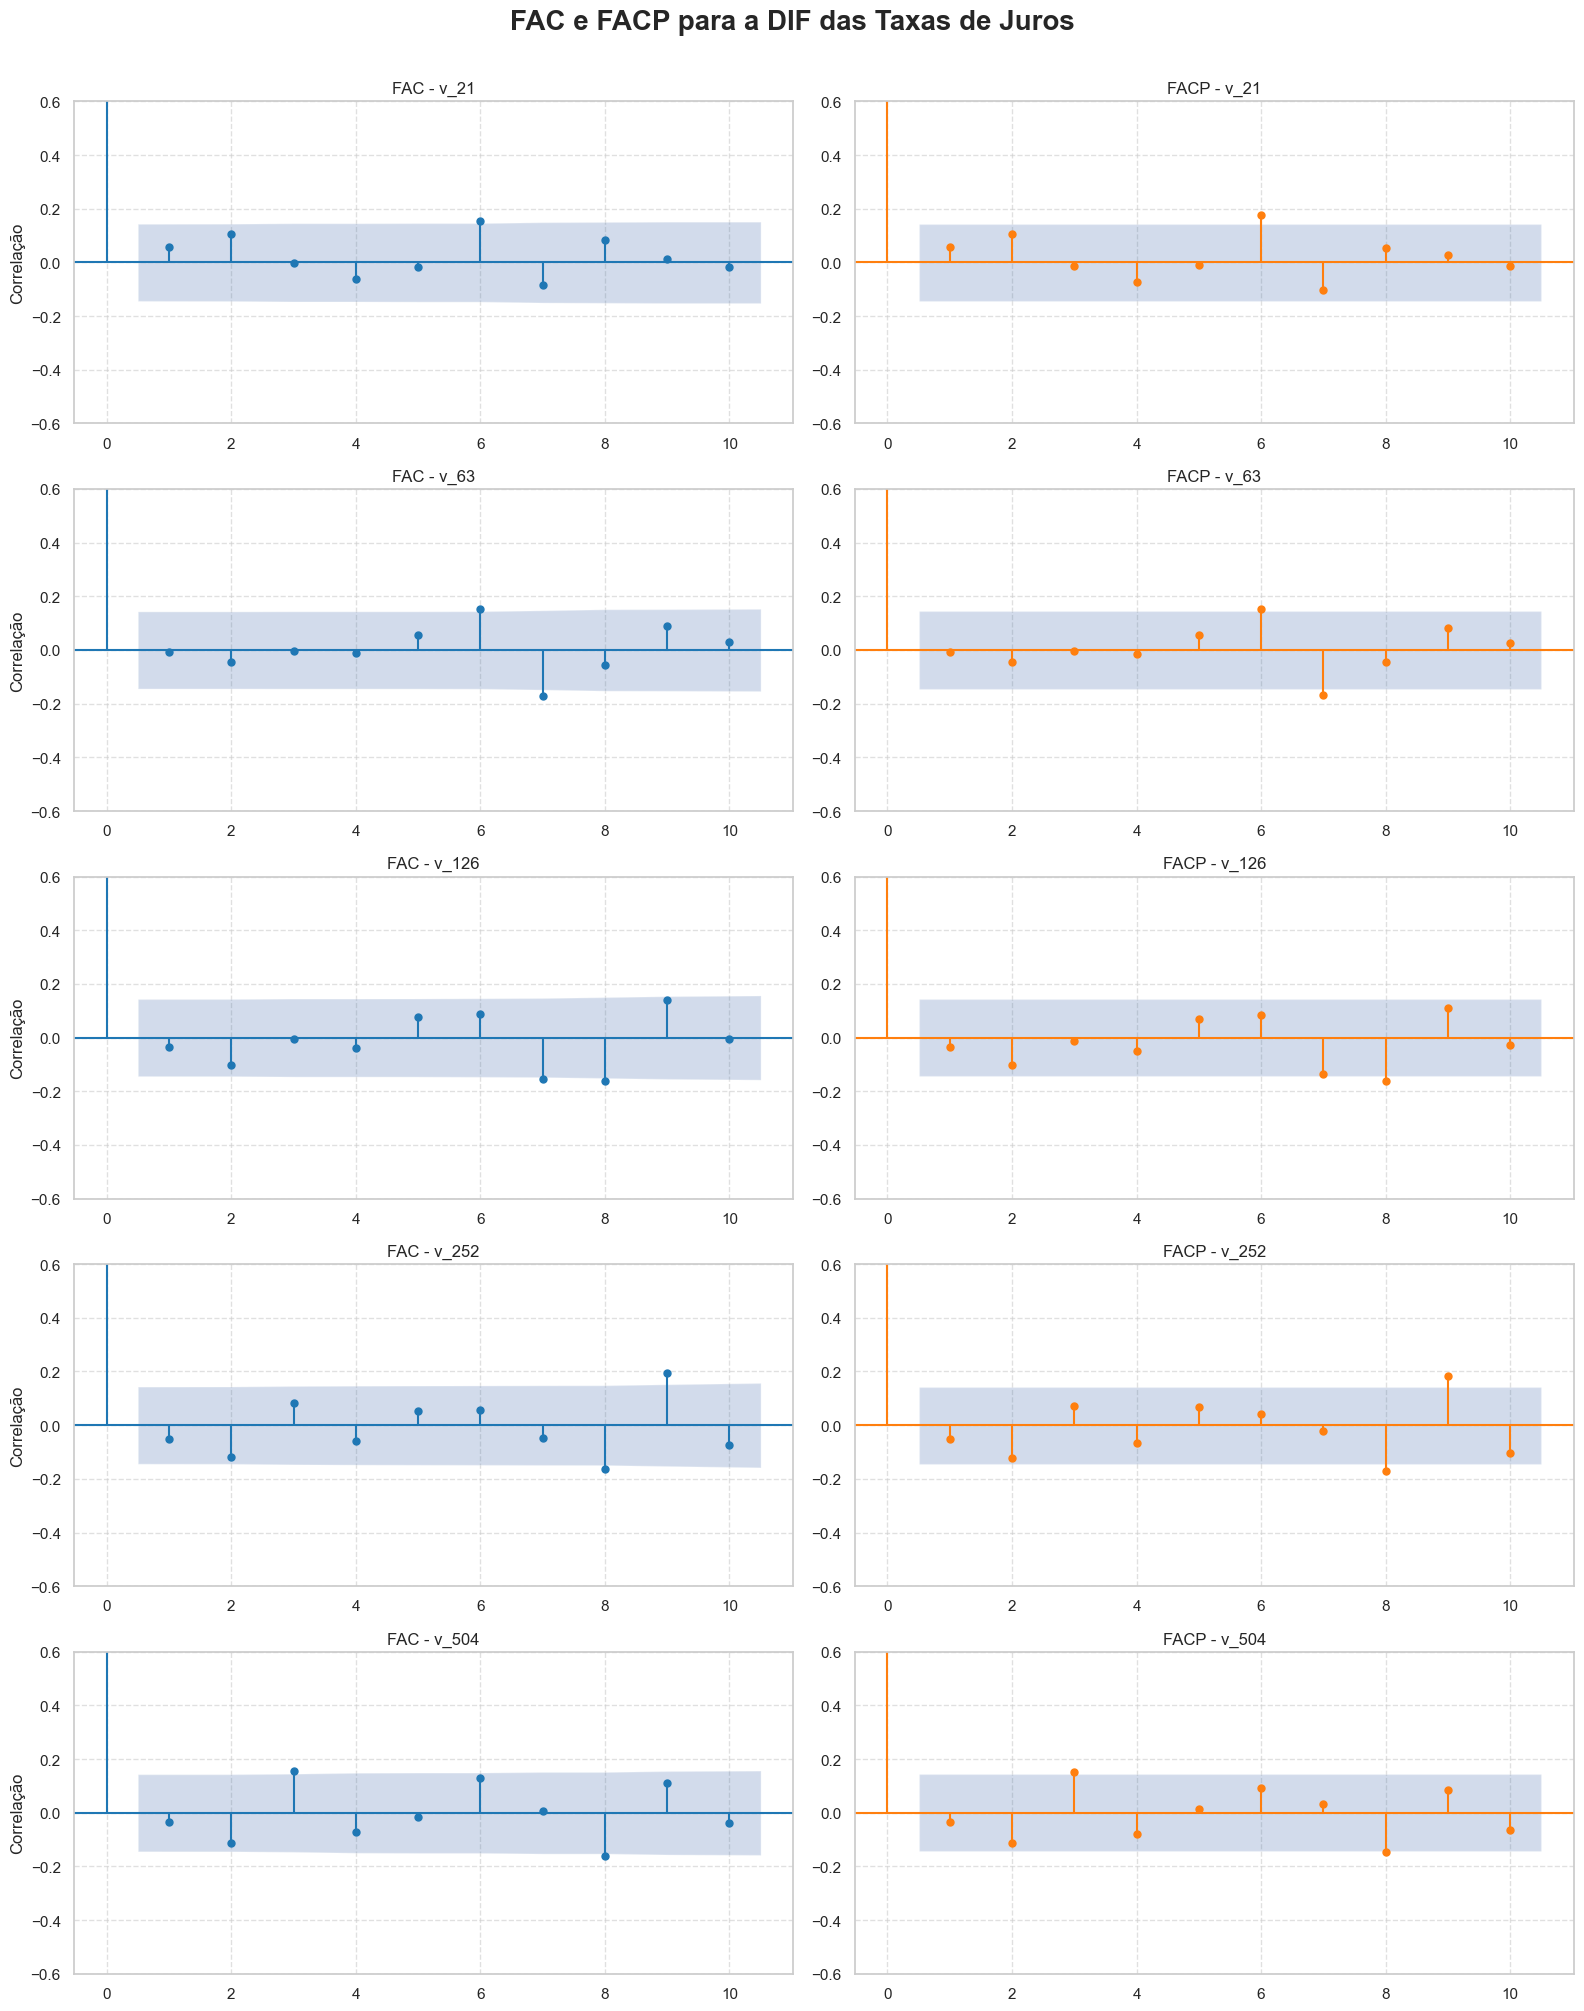

In [15]:

sns.set_theme(style="whitegrid")

columns = returns_pub_date.columns
num_series = len(columns)

fig, axes = plt.subplots(nrows=num_series, ncols=2, figsize=(16, 4 * num_series))

fig.suptitle("FAC e FACP para a DIF das Taxas de Juros", 
             fontsize=20, weight="bold", y=1.005)

y_min = -0.6
y_max = 0.6

for i, col in enumerate(columns):
    series = returns_pub_date[col].dropna()
    
    #FAC
    plot_acf(series, ax=axes[i, 0], title=f"FAC - {col}", lags=10, 
             color="tab:blue", vlines_kwargs={"colors": "tab:blue"})
    axes[i, 0].set_ylabel("Correlação")
    axes[i, 0].grid(True, linestyle="--", alpha=0.6)
    axes[i, 0].set_ylim(y_min, y_max)

    #FACP
    plot_pacf(series, ax=axes[i, 1], title=f"FACP - {col}", lags=10, 
              color="tab:orange", vlines_kwargs={"colors": "tab:orange"}, method="ywm")
    axes[i, 1].grid(True, linestyle="--", alpha=0.6)
    axes[i, 1].set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()